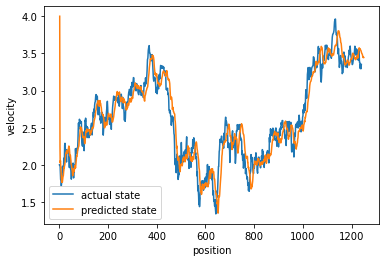

In [27]:
# -*- coding: utf-8 -*-
"""hw3p3.ipynb

Automatically generated by Colaboratory.
"""

import numpy as np
import matplotlib.pyplot as plt

def KF(x, P, z):
    #P_list.append(P)
    predict_xhat = F @ x
    predict_P = F @ P @ F.T + Q
    predict_P_list.append(predict_P)
    #print(f"The state covariance is {predict_P}")
    kalman_gain =  (predict_P @ H.T) / (H @ predict_P @ H.T + R)
    kalman_gain_list.append(kalman_gain)
    #print(f"The kalman_gain is {kalman_gain}")
    innovation_covariance = H @ predict_P @ H.T + R
    innovation_covariance_list.append(innovation_covariance)
    #print(f"The innovation_covariance is {innovation_covariance}")
    innovation_error = z - H @ predict_xhat
    innovation_error_list.append(innovation_error)
    new_xhat = predict_xhat + kalman_gain @ innovation_error
    m = (kalman_gain @ H).shape[0]
    new_P = (np.eye(m) - kalman_gain @ H) @ predict_P
    return new_xhat, new_P

P_list = []
predict_P_list = []
kalman_gain_list = []
innovation_covariance_list = []
innovation_error_list = []

F = np.array([[1, 0.5], [0, 1]])
H = np.array([[0, 1]])
Q = np.array([[0.1, 0.01], [0.01, 0.05]])
Q = Q * 0.1
#Q = Q * 1000
R = 0.1
#R = 0.1 * 0
#R = 0.1 * 100

x = np.array([[0.8, 2]])

xhat = np.array([[2, 4]])
P = np.array([[1,0], [0,2]])

for i in range(1000):
    #multivariate_normal(mean, cov, size)
    w = np.random.multivariate_normal(np.zeros(2), Q)
    #w = np.array([0,0])
    v = np.random.normal(0, R)
    x = np.vstack((x, F @ x[-1,:] + w))
    z = H @ x[-1,:] + v

    xnew, P = KF(xhat[-1,:], P, z)
    xhat = np.vstack((xhat, xnew))
    

plt.plot(x[:,0], x[:,1], label = "actual state")
plt.plot(xhat[:,0], xhat[:,1], label = "predicted state")
plt.legend()
plt.xlabel('position')
plt.ylabel('velocity')
plt.show()


In [26]:
print(P_list)
print(predict_P_list)
print(kalman_gain_list)
print(innovation_covariance_list)
print(innovation_error_list)

[]
[array([[101.5,  11. ],
       [ 11. ,  52. ]]), array([[199.22360845,  10.07101727],
       [ 10.07101727,  50.09980806]]), array([[297.24818671,  10.06996226],
       [ 10.06996226,  50.0998008 ]]), array([[395.27318587,  10.06996016],
       [ 10.06996016,  50.0998008 ]]), array([[493.29818587,  10.06996016],
       [ 10.06996016,  50.0998008 ]]), array([[591.32318587,  10.06996016],
       [ 10.06996016,  50.0998008 ]]), array([[689.34818587,  10.06996016],
       [ 10.06996016,  50.0998008 ]]), array([[787.37318587,  10.06996016],
       [ 10.06996016,  50.0998008 ]]), array([[885.39818587,  10.06996016],
       [ 10.06996016,  50.0998008 ]]), array([[983.42318587,  10.06996016],
       [ 10.06996016,  50.0998008 ]]), array([[1081.44818587,   10.06996016],
       [  10.06996016,   50.0998008 ]]), array([[1179.47318587,   10.06996016],
       [  10.06996016,   50.0998008 ]]), array([[1277.49818587,   10.06996016],
       [  10.06996016,   50.0998008 ]]), array([[1375.52318587,  

[array([0.77115596]), array([5.75901399]), array([-10.2015362]), array([-3.08794873]), array([-6.79099639]), array([-5.94188914]), array([-4.91973764]), array([-6.35000144]), array([4.09225394]), array([0.11479997]), array([7.74185358]), array([-8.25916405]), array([-11.6324964]), array([-12.03571898]), array([-17.32961628]), array([3.02366922]), array([9.02207014]), array([0.25851302]), array([-2.19517933]), array([4.95052569]), array([6.56453691]), array([-1.32036951]), array([-11.95181736]), array([-3.16035976]), array([-2.88305195]), array([1.67741362]), array([-2.91473727]), array([6.24398795]), array([10.45752781]), array([-0.47950569]), array([8.36922428]), array([12.51290234]), array([1.60714729]), array([-1.18853944]), array([2.07031735]), array([6.50959411]), array([-1.308515]), array([-18.04869906]), array([-4.27656298]), array([-7.23871957]), array([3.75267078]), array([1.48010211]), array([-2.26614]), array([-9.34011331]), array([6.18676596]), array([2.51098345]), array([2

In [17]:
predict_xhat = F @ np.array([0.8,2])
print(predict_xhat)
predict_P = F @ P @ F.T + Q
print(predict_P)
kalman_gain = (predict_P @ H.T) / (H @predict_P@H.T)
print(kalman_gain)
true_x = F @ [0.8,2] + [0.1,0.1]
print(f"true_x is {true_x}")
error = H @ true_x + 0.1 - H @ predict_xhat
print(error)
new_xhat = predict_xhat + kalman_gain @ error
print(new_xhat)

[1.8 2. ]
[[9903.69818587   10.06996016]
 [  10.06996016   50.0998008 ]]
[[0.20099801]
 [1.        ]]
true_x is [1.9 2.1]
[0.2]
[1.8401996 2.2      ]
